# Combining Gaussians

Suppose the underlying temperature we are measuring is steady at 23 C.

First import a bunch of components we will use...


In [1]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

There is a random variation with a mean of 0 and a standard deviation of 0.5 C due to manufacturing differences in the measurement devices. We can simulate the probability of getting different values from a randomly chosen device.

0.5003367431165007


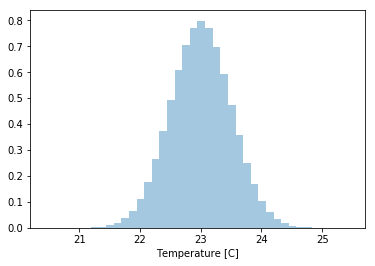

In [3]:
n = 1000000
Tm = 23
T1 = random.randn(n) * 0.5 + 0
hist(Tm + T1,bins=40,alpha = 0.4, density=True)
xlabel('Temperature [C]')
print(std(T1))

Looks like it will be within +/- 1 about 95% of the time. (+/- 2 standard deviations) Then there's additional electrical noise with a standard deviation of 1 C and a mean of 0. What do we get when we combine the two?

0.5003367431165007 0.9999519887473125 1.118202962186846
1.1181416888356022


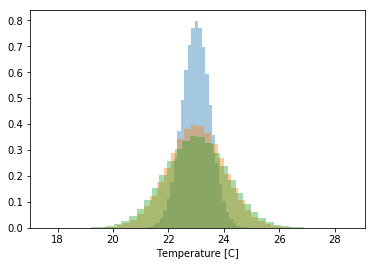

In [4]:
T2 = random.randn(n) * 1 + 0
hist(Tm+T1,bins=40,alpha = 0.4, density=True)
hist(Tm+T2,bins=40,alpha = 0.4, density=True)
hist(Tm+T1+T2,bins=40,alpha = 0.4, density=True)
xlabel('Temperature [C]')
print(std(T1),std(T2),std(T1+T2))
print(sqrt(std(T1)**2+std(T2)**2))

When you combine two Gaussian distributed random variables, the result is also a Gaussian. Th standard deviation of the combined result is the square root of the sum of the squares of the individual standard deviations.

\begin{equation}
s = \sqrt{s_1^2 + s_2^2}
\end{equation}

If the uncertainty (95%) is +/- 2 standard deviations, then the combined uncertainty is

\begin{equation}
u = 2s = 2\sqrt{s_1^2 + s_2^2}= \sqrt{(2s_1)^2 + (2s_2)^2}= \sqrt{u_1^2 + u_2^2}
\end{equation}

and for more sources of uncertainty

\begin{equation}
u = \sqrt{u_1^2 + u_2^2 + u_3^2 + \dots}
\end{equation}

This diminishing influence results because of the limited probability that all of the uncertainties will act at a large effect in the same direction. The result is the overall uncertainty in a measurement is often dominated by a single large contribution, even when there are many other small contributions.